## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
tf.__version__

'2.1.0-rc1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Great Learning Residency 8.1 CNN/Project 2/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [0]:
labels = pd.read_csv('/content/labels.csv')

In [6]:
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


### Print the count of each category of Dogs given in the dataset



In [7]:
print('Total count of dogs: ', labels.shape[0])
print('Number of dog Category: ', len(labels.breed.unique()))

Total count of dogs:  10222
Number of dog Category:  120


In [8]:
breed_count = labels['breed'].value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [9]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
breed_encoded = encoder.fit_transform(labels['breed'])
print(breed_encoded)

[19 37 85 ...  3 75 28]


In [0]:

import tensorflow.keras

y = tensorflow.keras.utils.to_categorical(breed_encoded,num_classes=None,dtype='int')

In [12]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols =128
num_channel = 1

In [14]:
from tqdm import tqdm
import cv2

x_feature =[]
y_feature = []


for f , img in tqdm(labels.values):
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
    x_feature.append(train_img_resize)
    y_feature.append(img)

100%|██████████| 10222/10222 [00:28<00:00, 354.25it/s]


In [15]:
y_feature[1]

'dingo'

In [16]:
x_feature[1]

array([[[ 35,  45,  63],
        [ 19,  33,  57],
        [ 22,  42,  74],
        ...,
        [ 37,  69, 112],
        [ 16,  48,  91],
        [ 25,  45,  76]],

       [[ 19,  33,  55],
        [ 16,  31,  57],
        [ 17,  35,  62],
        ...,
        [ 19,  34,  58],
        [  4,  16,  39],
        [ 28,  36,  51]],

       [[ 15,  35,  67],
        [ 17,  34,  63],
        [ 22,  35,  61],
        ...,
        [  5,  13,  32],
        [ 26,  40,  59],
        [ 17,  18,  31]],

       ...,

       [[ 32,  95, 169],
        [ 45, 117, 187],
        [ 15,  70, 152],
        ...,
        [  9,  20,  47],
        [ 17,  24,  48],
        [ 12,  21,  35]],

       [[ 27,  99, 179],
        [ 34, 109, 180],
        [ 35,  79, 158],
        ...,
        [ 21,  30,  50],
        [ 17,  21,  48],
        [ 23,  26,  47]],

       [[ 52, 124, 203],
        [ 50, 124, 195],
        [ 20,  65, 145],
        ...,
        [  5,  16,  42],
        [  1,   5,  38],
        [ 19,  20,  49]]

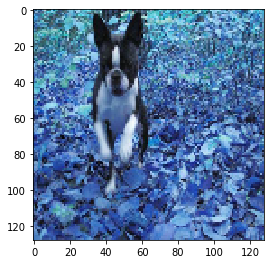

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(50,50))

for i in range(1):
  plt.subplot(10,10,i+1)
  plt.imshow(x_feature[i], cmap=plt.cm.binary)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_feature = np.array(x_feature, dtype=np.float32)

In [19]:
x_feature /= 255
print('x_feature shape:', x_feature.shape)

x_feature shape: (10222, 128, 128, 3)


In [20]:
x_feature[1]

array([[[0.13725491, 0.1764706 , 0.24705882],
        [0.07450981, 0.12941177, 0.22352941],
        [0.08627451, 0.16470589, 0.2901961 ],
        ...,
        [0.14509805, 0.27058825, 0.4392157 ],
        [0.0627451 , 0.1882353 , 0.35686275],
        [0.09803922, 0.1764706 , 0.29803923]],

       [[0.07450981, 0.12941177, 0.21568628],
        [0.0627451 , 0.12156863, 0.22352941],
        [0.06666667, 0.13725491, 0.24313726],
        ...,
        [0.07450981, 0.13333334, 0.22745098],
        [0.01568628, 0.0627451 , 0.15294118],
        [0.10980392, 0.14117648, 0.2       ]],

       [[0.05882353, 0.13725491, 0.2627451 ],
        [0.06666667, 0.13333334, 0.24705882],
        [0.08627451, 0.13725491, 0.23921569],
        ...,
        [0.01960784, 0.05098039, 0.1254902 ],
        [0.10196079, 0.15686275, 0.23137255],
        [0.06666667, 0.07058824, 0.12156863]],

       ...,

       [[0.1254902 , 0.37254903, 0.6627451 ],
        [0.1764706 , 0.45882353, 0.73333335],
        [0.05882353, 0

In [0]:
x_feature = x_feature.reshape(x_feature.shape[0],128,128,3)

In [22]:
encoder =  LabelEncoder()
y_feature = encoder.fit_transform(y_feature)
print(y_feature)

[19 37 85 ...  3 75 28]


In [0]:
y_feature = tensorflow.keras.utils.to_categorical(y_feature,num_classes=None,dtype='int')

In [24]:
y_feature[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
x_train_data=x_feature

In [0]:
y_train_data = y_feature

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
trainX, validationX,trainY,validationY = train_test_split(x_train_data,y_train_data, test_size=0.3, random_state=100)

In [28]:
trainX.shape

(7155, 128, 128, 3)

In [29]:
validationX.shape

(3067, 128, 128, 3)

In [30]:
trainY.shape

(7155, 120)

In [31]:
validationY.shape

(3067, 120)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = pd.read_csv("/content/sample_submission.csv" , usecols = ["id"])

In [39]:
test_img.shape

(10357, 1)

In [0]:
test_img = test_img['id']

In [41]:
format(test_img.values)

"['000621fb3cbb32d8935728e48679680e' '00102ee9d8eb90812350685311fe5890'\n '0012a730dfa437f5f3613fb75efcd4ce' ... 'fff74b59b758bbbf13a5793182a9bbe4'\n 'fff7d50d848e8014ac1e9172dc6762a3' 'fffbff22c1f51e3dc80c4bf04089545b']"

In [42]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [43]:
x_test_feature = []
i = 0 # initialisation

for t in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(t), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:28<00:00, 367.93it/s]


In [44]:
x_test_feature[1]

array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[105, 110, 107],
        [ 86,  91,  88],
        [101, 106, 103],
        ...,
        [ 99, 109, 110],
        [ 92, 102, 103],
        [104, 107, 109]],

       [[113, 118, 113],
        [122, 128, 122],
        [124, 129, 126],
        ...,
        [120, 126, 123],
        [113, 119, 116],
        [115, 118, 122]],

       [[116, 122, 117],
        [114, 119, 117],
        [127, 132, 131],
        ...,
        [126, 129, 127],
        [120, 123, 121],
        [108, 110, 111]]

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature_ar = np.array(x_test_feature, dtype=np.float32)

In [0]:
x_test_feature_ar /= 255

In [47]:
x_test_feature_ar.shape[0]

10357

In [0]:
x_test_feature = x_test_feature_ar.reshape(x_test_feature_ar.shape[0],128,128,3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import LeakyReLU

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, input_shape = (128,128,3), kernel_size=5)) 
model.add(Conv2D(filters=64, kernel_size=3))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=256, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dense(units = 120, activation = 'softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [56]:
history = model.fit(trainX,trainY,
                    epochs=10, 
                    validation_data=(validationX,validationY),
                    verbose = 1,
                    batch_size=128)

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 17s 2ms/sample - loss: 16.4091 - accuracy: 0.0095 - val_loss: 4.7960 - val_accuracy: 0.0104
Epoch 2/10
7155/7155 [==============================] - 12s 2ms/sample - loss: 4.7862 - accuracy: 0.0101 - val_loss: 4.7870 - val_accuracy: 0.0134
Epoch 3/10
7155/7155 [==============================] - 12s 2ms/sample - loss: 4.7834 - accuracy: 0.0098 - val_loss: 4.7882 - val_accuracy: 0.0124
Epoch 4/10
7155/7155 [==============================] - 12s 2ms/sample - loss: 4.7823 - accuracy: 0.0109 - val_loss: 4.7927 - val_accuracy: 0.0101
Epoch 5/10
7155/7155 [==============================] - 12s 2ms/sample - loss: 4.7825 - accuracy: 0.0099 - val_loss: 4.7856 - val_accuracy: 0.0108
Epoch 6/10
7155/7155 [==============================] - 12s 2ms/sample - loss: 4.7809 - accuracy: 0.0115 - val_loss: 4.7894 - val_accuracy: 0.0111
Epoch 7/10
7155/7155 [==============================] - 12s 2ms/sampl

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
train_datagen.fit(trainX)

In [0]:
val_datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
val_datagen.fit(validationX)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(trainX,trainY, batch_size=9)
val_generator = val_datagen.flow(validationX,validationY, batch_size=9)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [61]:
model.fit_generator(train_generator,\
                    epochs=10, steps_per_epoch=300, \
                    verbose=1,validation_data=val_generator, validation_steps = 300)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 300 steps, validate for 300 steps
Epoch 1/10
300/300 [==============================] - 30s 99ms/step - loss: 4.8076 - accuracy: 0.0093 - val_loss: 4.7834 - val_accuracy: 0.0115
Epoch 2/10
300/300 [==============================] - 29s 98ms/step - loss: 4.7942 - accuracy: 0.0104 - val_loss: 4.7829 - val_accuracy: 0.0096
Epoch 3/10
300/300 [==============================] - 30s 99ms/step - loss: 4.8485 - accuracy: 0.0093 - val_loss: 4.7829 - val_accuracy: 0.0096
Epoch 4/10
300/300 [==============================] - 29s 98ms/step - loss: 4.7798 - accuracy: 0.0100 - val_loss: 4.7825 - val_accuracy: 0.0096
Epoch 5/10
300/300 [==============================] - 29s 97ms/step - loss: 4.7788 - accuracy: 0.0085 - val_loss: 4.7820 - val_accuracy: 0.0096
Epoch 6/10
300/300 [==============================] - 29s 97ms/step - loss: 4.7796 - accuracy: 0.0085 - val_lo

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
import keras.backend.common as k
k.set_image_dim_ordering('th')

In [0]:
project_path = "/content/drive/My Drive/Great Learning Residency 8.1 CNN/Project 2/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=project_path,
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [82]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras.layers import Input
input = Input(shape=(128,128,3),name = 'image_input')
output_vgg16 = base_model(input)

In [0]:
x = base_model.output
#x = Flatten()(x)
x = Dense(1024, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [85]:

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in m.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_2
True
block1_conv1
True
block1_conv2
True
block1_pool
True
block2_conv1
True
block2_conv2
True
block2_pool
True
block3_conv1
True
block3_conv2
True
block3_conv3
True
block3_pool
True
block4_conv1
True
block4_conv2
True
block4_conv3
True
block4_pool
True
block5_conv1
True
block5_conv2
True
block5_conv3
True
block5_pool
True
global_average_pooling2d_1
True
dense_5
True
dropout_3
True
dense_6
True
dropout_4
True
dense_7
True


In [0]:
for layer in m.layers:
    m.trainable = False

In [87]:

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in m.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))


input_2
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d_1
False
dense_5
False
dropout_3
False
dense_6
False
dropout_4
False
dense_7
False


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [0]:
m.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

Try to get training and validation accuracy to be more than 90%

In [89]:
m_output =  m.fit_generator(train_generator, epochs=10, steps_per_epoch=1000 // 8,
                            validation_data=val_generator, validation_steps=128,
                            verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 128 steps
Epoch 1/10
125/125 [==============================] - 10s 79ms/step - loss: 0.0492 - accuracy: 0.9917 - val_loss: 0.0487 - val_accuracy: 0.9917
Epoch 2/10
125/125 [==============================] - 9s 72ms/step - loss: 0.0491 - accuracy: 0.9917 - val_loss: 0.0487 - val_accuracy: 0.9917
Epoch 3/10
125/125 [==============================] - 9s 71ms/step - loss: 0.0491 - accuracy: 0.9917 - val_loss: 0.0488 - val_accuracy: 0.9917
Epoch 4/10
125/125 [==============================] - 9s 71ms/step - loss: 0.0492 - accuracy: 0.9917 - val_loss: 0.0488 - val_accuracy: 0.9917
Epoch 5/10
125/125 [==============================] - 9s 71ms/step - loss: 0.0491 - accuracy: 0.9917 - val_loss: 0.0488 - val_accuracy: 0.9917
Epoch 6/10
125/125 [==============================] - 9s 74ms/step - loss: 0.0492 - accuracy: 0.9917 - val_loss: 0.0487 - val_accuracy: 0.9917
Epoch 7/10
125/125 [===========================